Okay I still should check that boltzmann stuff is working properly before doing the Q-values, so try running the boltzmann on the reward matrix rather than the q values and check that it gives you the distribution you'd expect just to make sure I'm not messing anything up there. 

Then if that's all fine, which it probably is, have another look at the Q-value and V-Value calculations in learn, and if they look right then step through and check that it's doing what I expect them to be doing. 

If it's something wrong with one of those then that might fix the learning side of things as well, but at least we'll have a proper trajectory to learn from because atm the one it's creating, and the resulting policy is abysmal, so fix that first, get the expert to perform more expertly and then you can check to see if there are problems with the learning algorithm :) 

Issue has to be in policy iteration somewhere 

In [1]:
%reload_ext autoreload
from env import SingleStateSpace 
from generate_trajectory import generate_trajectory
from policy import Boltzmann 
from learn import compute_q_with_values
from RewardFunctions import SingleStateReward
import numpy as np 
from learn import policy_iteration
from utils import normalise_pi
from policy_walk import policy_walk 

Generated observation times:
[ 1.17960613  2.06060184  4.05362221  4.30964403  4.44774537  5.56037616
  7.4460843   8.41510897  9.52211881 11.41563414 13.20592084 13.33519462
 13.89832591 14.42208965 15.79527985 17.2571749  17.80435996 18.45716025
 18.71240235 19.29535367]
[[2.63652299e-08 2.76342333e-01 3.90997225e-04 7.36339401e-06
  7.61023955e-06 5.66831311e-01 3.99618440e-04 1.12291895e-06
  4.04258875e-02 8.48278114e-06 2.65028735e-07 8.05685559e-06
  5.66835368e-01 4.04241670e-02 7.85855314e-06 4.04202802e-02
  1.07583753e+00 3.91018835e-04 3.91430626e-04 2.76346296e-01]]


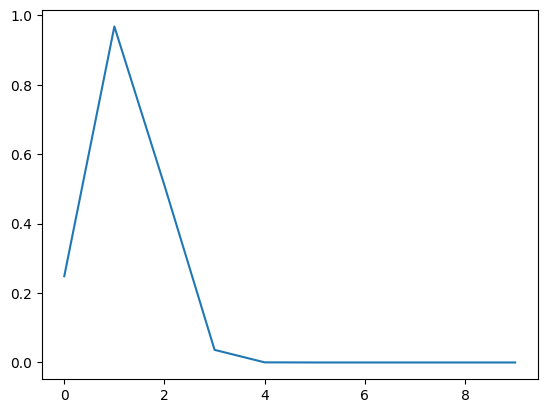

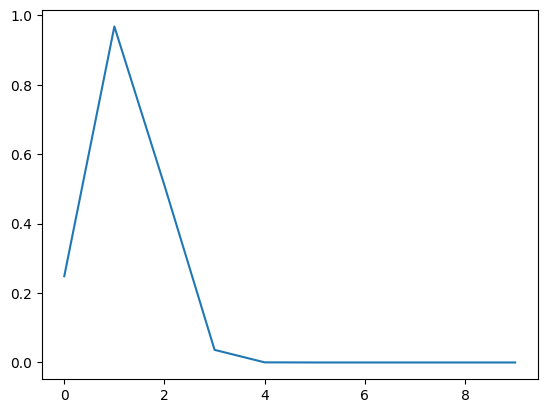

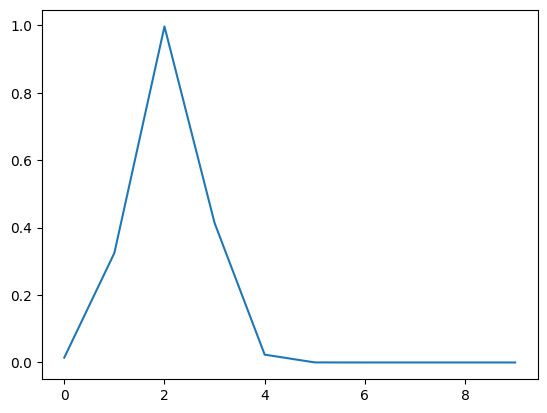

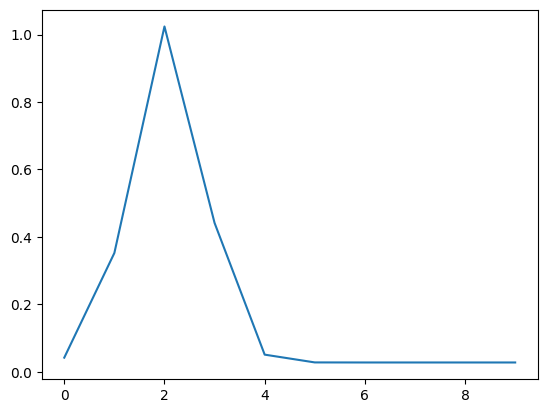

[[1.07582967e+00 5.66832911e-01 3.90040089e-04 3.90036253e-04
  3.90036255e-04 5.66840314e-06 3.99618655e-09 1.12291895e-11
  4.04258875e-07 8.48278114e-11 2.65244095e-12 8.05707096e-11
  5.66844372e-06 4.04331703e-07 3.90036258e-04 4.04182720e-02
  5.66840906e-01 5.66830152e-01 1.07582968e+00 1.07583244e+00]]


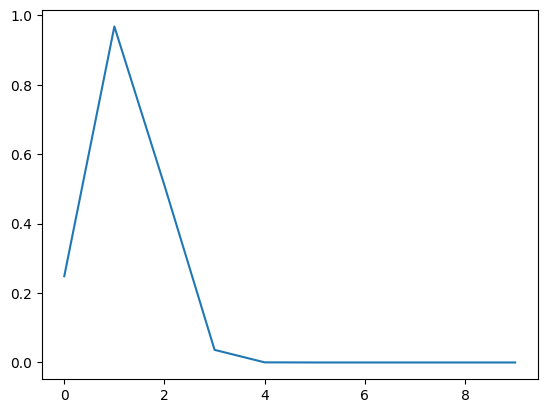

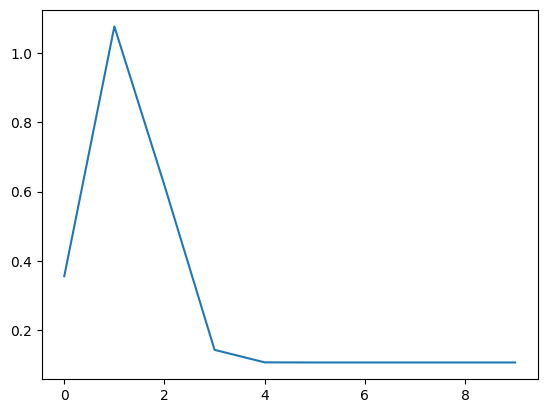

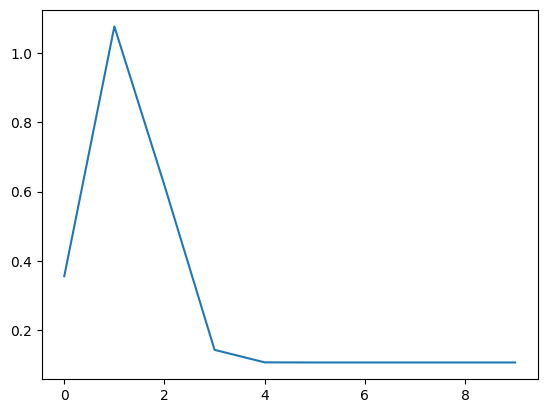

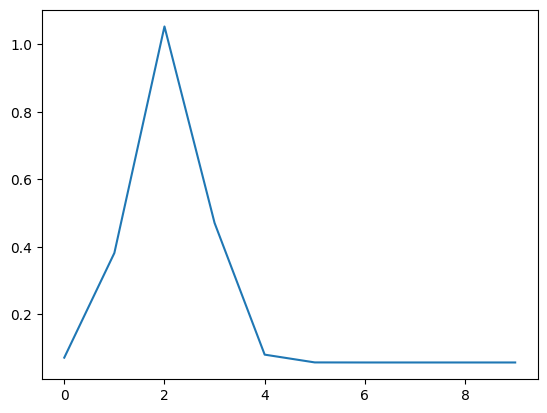

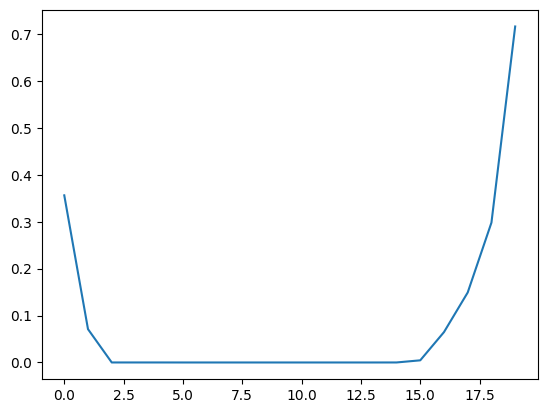

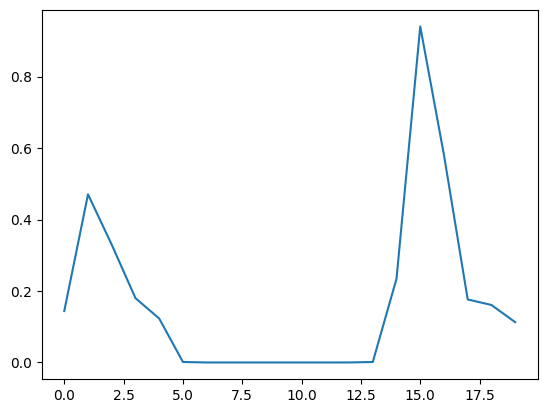

reward 1.9382618441744686e-15
reward 0.9963341532223664
reward 0.00016975708043612847
reward 0.0007187368632548736
reward 0.7371342981170458
reward 0.12586859616197196
reward 8.999003958352272e-19
reward 0.0029300044923272726
reward 0.0985840630216029
reward 1.0429172014571542e-25
reward 2.6311554754401394e-15
reward 0.16817592564852077
reward 0.01206997928896176
reward 7.91363893802831e-10
reward 0.00040420457729081635
reward 0.9360008180106725
reward 9.455167533780097e-11
reward 0.11963426178184589
reward 6.734447520794752e-15
reward 6.638165731334803e-13


In [2]:

trajectory_length = 20 
#set up the agent and their policy 
env = SingleStateSpace(n_actions = 10, discount_rate = 0.1, R_max = 5)
#so we have access to env.reward
observation_times = np.cumsum(np.random.uniform(0, 2, size=trajectory_length))
print("Generated observation times:") 
print(observation_times)

#this isn't right but for now I'm just normalising pi - really it should be a boltzmann - later on I turn the Q-vals into a distribution via boltzmann 
#so it won't be able to learn i don't think 


# Use meshgrid to create a grid of all possible combinations of s, a, and t
s_grid, a_grid, t_grid = np.meshgrid(env.states, env.actions, observation_times, indexing='ij')
R = np.vectorize(env.reward)(s_grid,a_grid,t_grid)

# Calculate the reward for each combination using vectorized operations - oh I'm not actually using a boltzmann policy here I'm just using a normalised reward vector? 
(optimal_pi, optimal_values) = policy_iteration(env, len(observation_times), R)
optimal_q_values = np.ones((env.n_states, env.n_actions, len(observation_times)))
for s in range(env.n_states):
    for a in range(env.n_actions): 
        for t in range(len(observation_times)):
            optimal_q_values[s,a,t] = compute_q_with_values(env,s,a,t,optimal_values,R) 

boltzmann_policy = Boltzmann(optimal_q_values, env.actions)

#What is my initial policy? Everywhere I've seen, boltzmann is defined using the Q-values but you
#need a policy to find the Q-values so what is the actual policy? 
#Is it just like an exponential style distribution over the rewards? 
observations = generate_trajectory(env, boltzmann_policy, observation_times)

# print("Generated trajectory") 
# print(observations)

# print("Running policy walk") 
# learned_R = policy_walk(env, observations, optimal_q_values) # there's a better way than passing in the Q* values but I cba dealing with it now 
# print("finished learning policy")

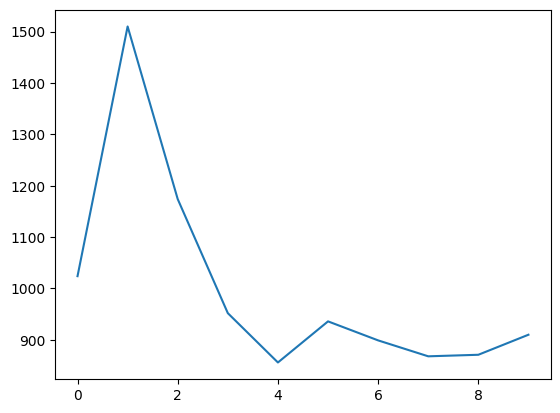

In [26]:
b = boltzmann_policy #ok so boltzmann does work but it's just too bad atm, over time though it'll eventually make the right
#decisions 
count = np.zeros(env.n_actions)
for i in range(10000): 
    count[b(0,0)] += 1
plt.plot(count) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
for t in range(len(observations)):
    plt.plot(R[0,:,t])
    plt.show()